In [2]:
import tweepy

In [3]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
consumerkey='O005REOMy6dYHWgefIyMFSJye'
consumersecret='QgyoqrP2H9IPFl4oTJGl9MUvo3015wBqlXg0DACIY67LoYwHnB'
accesstoken='1181924258567655424-a9pM1XhJwvHYxcxkb3OfjNaHCiAN2p'
accesstokensecret='0qwsTgud5Nwy8b5ArQurmrzJ4AjVMC57Xo7AtenUjCPkY'
auth=tweepy.OAuthHandler(consumerkey,consumersecret)
auth.set_access_token(accesstoken,accesstokensecret)

In [4]:
api=tweepy.API(auth)

In [5]:
searchterm=input('Enter Keyword/Tag here:')
noofterms=int(input('Enter the number of tweets to search for:'))
tweets=[]
tweettext=[]
tweets=tweepy.Cursor(api.search,q=searchterm+" -filter:retweets",lang="en").items(noofterms)

Enter Keyword/Tag here:squid games
Enter the number of tweets to search for:2000


In [6]:
tweet_list=[tweet.text for tweet in tweets]
sg=pd.DataFrame(tweet_list)

In [7]:
sg.shape

(2000, 1)

In [8]:
sg.head()

,0
0,That Glass Game In Squid Games Had My Anxiety ...
1,@99vsual Yess the plot and the cast are very g...
2,I hate the fact that I’ve only started watchin...
3,@little7bitch Squid games?
4,Soon as Baljeet died in squid games I stopped ...


In [9]:
#To get working directory
pwd

'C:\\Users\\Faith\\Desktop\\SQUID GAME'

In [10]:
#Saving dataframe containing tweets into a dataframe
sg.to_csv('C:\\Users\\Faith\\Desktop\\SQUID GAME//df.csv')

In [4]:
# importing dataset
data=pd.read_csv('df.csv')

In [5]:
data.head()

,Unnamed: 0,0
0,0,That Glass Game In Squid Games Had My Anxiety ...
1,1,@99vsual Yess the plot and the cast are very g...
2,2,I hate the fact that I’ve only started watchin...
3,3,@little7bitch Squid games?
4,4,Soon as Baljeet died in squid games I stopped ...


# Data Preprocessing

We will create a function for pre-processing of data.The data type of the tweet column would be changed from object to string as this is text data.

First, we will get rid of any characters apart from alphabets by replacing the special characters with a blank space.
Then, we will convert the string to lowercase as the word “Good” is different from the word “good”.

Note — Because, if we don’t convert the string to lowercase, it will cause an issue, when we will create vectors of these words, as two different vectors will be created for the same word, which we don’t want to.

In [6]:
#To drop the first column
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
#Renaming the column containing tweets
data.columns=['data']

In [8]:
data.head()

,data
0,That Glass Game In Squid Games Had My Anxiety ...
1,@99vsual Yess the plot and the cast are very g...
2,I hate the fact that I’ve only started watchin...
3,@little7bitch Squid games?
4,Soon as Baljeet died in squid games I stopped ...


In [9]:
#To check the data type of the olumn containing the tweets
data.dtypes

data    object
dtype: object

In [10]:
#Converting data into string type
data['data']=data['data'].astype('str')

In [11]:
#Removing special characters
data['tweet']=data['data'].str.replace("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", " ")

In [12]:
#Removing numbers and tags
data['tweet']=data['tweet'].str.replace("[^a-zA-Z# ]", "")

In [13]:
data.head()

,data,tweet
0,That Glass Game In Squid Games Had My Anxiety ...,That Glass Game In Squid Games Had My Anxiety ...
1,@99vsual Yess the plot and the cast are very g...,Yess the plot and the cast are very good and...
2,I hate the fact that I’ve only started watchin...,I hate the fact that I ve only started watchin...
3,@little7bitch Squid games?,Squid games
4,Soon as Baljeet died in squid games I stopped ...,Soon as Baljeet died in squid games I stopped ...


In [14]:
#converting all the words into lower case
data['tweet']=data['tweet'].str.lower()

In [15]:
data.tweet

0       that glass game in squid games had my anxiety ...
1         yess the plot and the cast are very good and...
2       i hate the fact that i ve only started watchin...
3                                            squid games 
4       soon as baljeet died in squid games i stopped ...
                              ...                        
1995    my bf clowns me for watching kdramas but over ...
1996    no way that old man created the squid games ca...
1997      neverthless squid games extracuricullar move...
1998    just watched ep  squid games with dynox and lu...
1999    starting squid games now see y all in the morn...
Name: tweet, Length: 2000, dtype: object

Adding new features to the dataframe

In [16]:
#Word count
data['word_count']=data['tweet'].apply(lambda x: len(x.split()))

In [17]:
#Character count
data['char_count']=data['tweet'].apply(len)

In [18]:
#Word density
data['word_density']=data['word_count']/data['char_count']

 Next, we will check for stopwords in the data and get rid of them.Stopwords are commonly used words in a sentence such as “the”, “an”, “to” etc. which do not add much value.
 
Then, we will perform lemmatization on each word, i.e. change the different forms of a word into a single item called a lemma.

 A lemma is a base form of a word. For example, “run”, “running” and “runs” are all forms of the same lexeme, where the “run” is the lemma. Hence, we are converting all occurrences of the same lexeme to their respective lemma.
 
And, then we will return a corpus of processed data.


In [19]:
#Converting data into string type
data['tweet']=data['tweet'].astype('str')

In [20]:
#Removing stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
data['tweet']=data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [21]:
#Lemmatization-reducing word to its root or parent form
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemma=WordNetLemmatizer()
token=word_tokenize
def lemmatize_text(text):
    return[lemma.lemmatize(w) for w in token(text)]

In [22]:
data['tweet']=data['tweet'].apply(lemmatize_text)

In [23]:
data['tweet'].head()

0      [glass, game, squid, game, anxiety, thru, roof]
1    [yes, plot, cast, good, game, well, thought, s...
2    [hate, fact, started, watching, squid, game, m...
3                                        [squid, game]
4    [soon, baljeet, died, squid, game, stopped, wa...
Name: tweet, dtype: object

Word Cloud

Let's  create a Word Cloud which is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as compared to less frequent words. This gives us a little insight into, how the data looks after being processed through all the steps until now.

In [24]:
from wordcloud import WordCloud

In [25]:
data['tweet']=data['tweet'].astype('str')

In [26]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
import re
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus = text_transformation(data['tweet'])

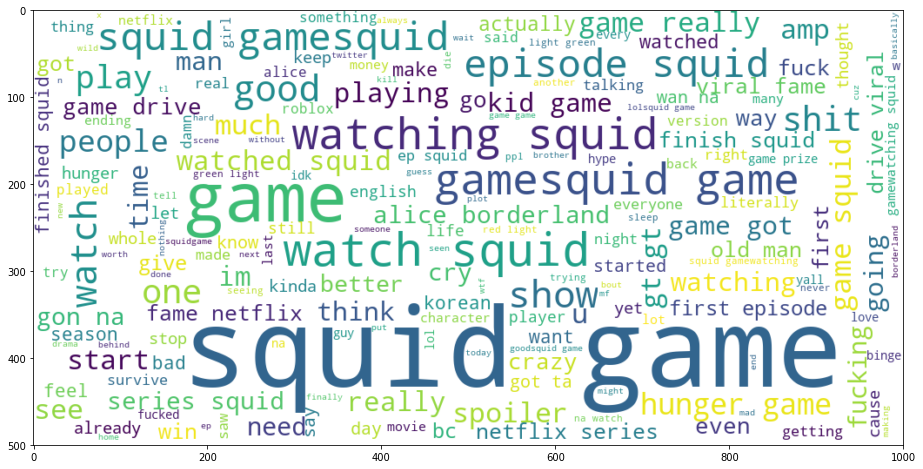

In [27]:
data['tweet']=data['tweet'].astype('str')
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [28]:
data.head()

,data,tweet,word_count,char_count,word_density
0,That Glass Game In Squid Games Had My Anxiety ...,"['glass', 'game', 'squid', 'game', 'anxiety', ...",12,60,0.200000
1,@99vsual Yess the plot and the cast are very g...,"['yes', 'plot', 'cast', 'good', 'game', 'well'...",19,94,0.202128
2,I hate the fact that I’ve only started watchin...,"['hate', 'fact', 'started', 'watching', 'squid...",21,109,0.192661
3,@little7bitch Squid games?,"['squid', 'game']",2,14,0.142857
4,Soon as Baljeet died in squid games I stopped ...,"['soon', 'baljeet', 'died', 'squid', 'game', '...",11,56,0.196429


# Creating a sentiment analyzer engine

Textblob library would be used to find the sentiment of the tweet.Textblob function has a function called sentiment which can be used to find the polarity and subjectivity of a tweet. We are more interested in the polarity which determines the sentimental aspect of an opinion.

The sentiment polarity can be determined as positive, negative and neutral

In [29]:
import textblob
from textblob import TextBlob

In [30]:
def sent(text):
    return TextBlob(str(text)).sentiment.polarity

In [31]:
data['polarity']=data['tweet'].apply(sent)

In [32]:
data.head()

,data,tweet,word_count,char_count,word_density,polarity
0,That Glass Game In Squid Games Had My Anxiety ...,"['glass', 'game', 'squid', 'game', 'anxiety', ...",12,60,0.200000,-0.400000
1,@99vsual Yess the plot and the cast are very g...,"['yes', 'plot', 'cast', 'good', 'game', 'well'...",19,94,0.202128,-0.033333
2,I hate the fact that I’ve only started watchin...,"['hate', 'fact', 'started', 'watching', 'squid...",21,109,0.192661,-0.233333
3,@little7bitch Squid games?,"['squid', 'game']",2,14,0.142857,-0.400000
4,Soon as Baljeet died in squid games I stopped ...,"['soon', 'baljeet', 'died', 'squid', 'game', '...",11,56,0.196429,-0.400000


In [33]:
#To get the summary statistics
data.polarity.describe()

count    2000.000000
mean       -0.244670
std         0.215205
min        -0.700000
25%        -0.400000
50%        -0.400000
75%        -0.100000
max         1.000000
Name: polarity, dtype: float64

In [34]:
#To classify the polarity score into positive, negative and neutral
def classify(text):
    pol=TextBlob(str(text)).sentiment.polarity
    if pol == 0:
        return('Neutral')
    elif pol < 0:
        return('Negative')
    elif  pol > 0:
        return('Positive')

In [35]:
data['class']=data['tweet'].apply(classify)

In [36]:
data.head()

,data,tweet,word_count,char_count,word_density,polarity,class
0,That Glass Game In Squid Games Had My Anxiety ...,"['glass', 'game', 'squid', 'game', 'anxiety', ...",12,60,0.200000,-0.400000,Negative
1,@99vsual Yess the plot and the cast are very g...,"['yes', 'plot', 'cast', 'good', 'game', 'well'...",19,94,0.202128,-0.033333,Negative
2,I hate the fact that I’ve only started watchin...,"['hate', 'fact', 'started', 'watching', 'squid...",21,109,0.192661,-0.233333,Negative
3,@little7bitch Squid games?,"['squid', 'game']",2,14,0.142857,-0.400000,Negative
4,Soon as Baljeet died in squid games I stopped ...,"['soon', 'baljeet', 'died', 'squid', 'game', '...",11,56,0.196429,-0.400000,Negative


In [37]:
#To display all rows
pd.set_option('display.max_rows', 2000)

In [38]:
#To check the distribution of each class
data['class'].value_counts()

Negative    1651
Positive     324
Neutral       25
Name: class, dtype: int64

# EDA and Visualizations

In [39]:
import seaborn as sns
sns.set_style('darkgrid')

In [40]:
data.columns

Index(['data', 'tweet', 'word_count', 'char_count', 'word_density', 'polarity',
       'class'],
      dtype='object')

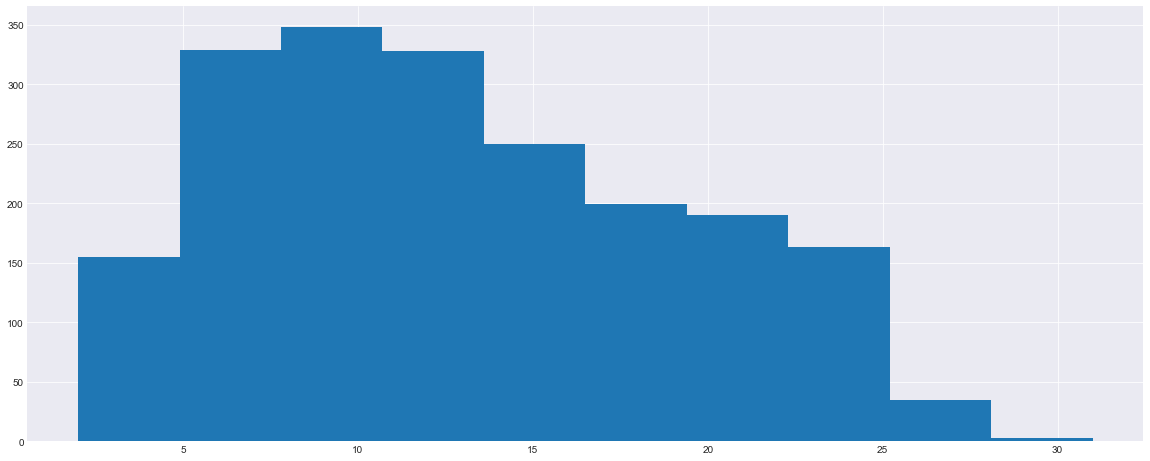

In [41]:
#Distribution of word count
data['word_count'].hist()

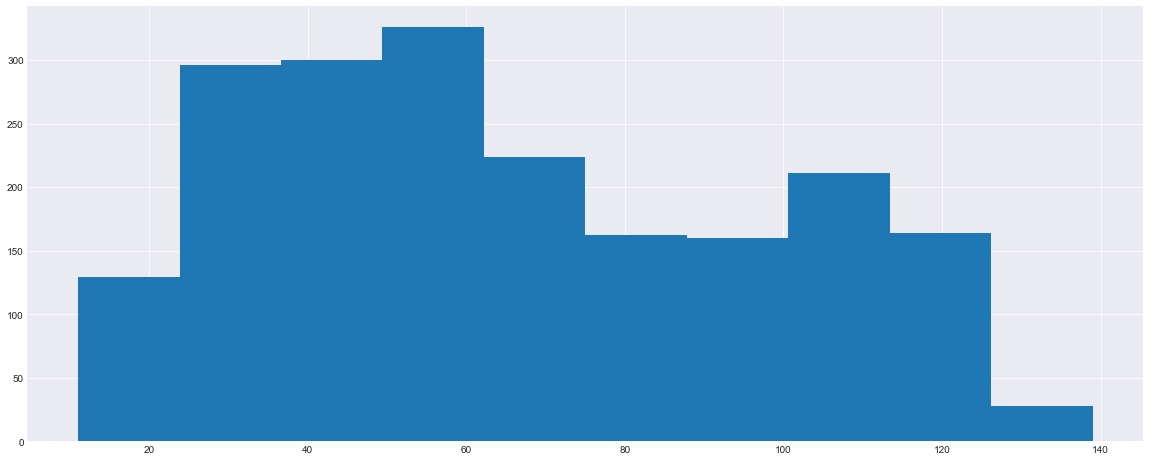

In [42]:
#Distribution of character count
data['char_count'].hist()

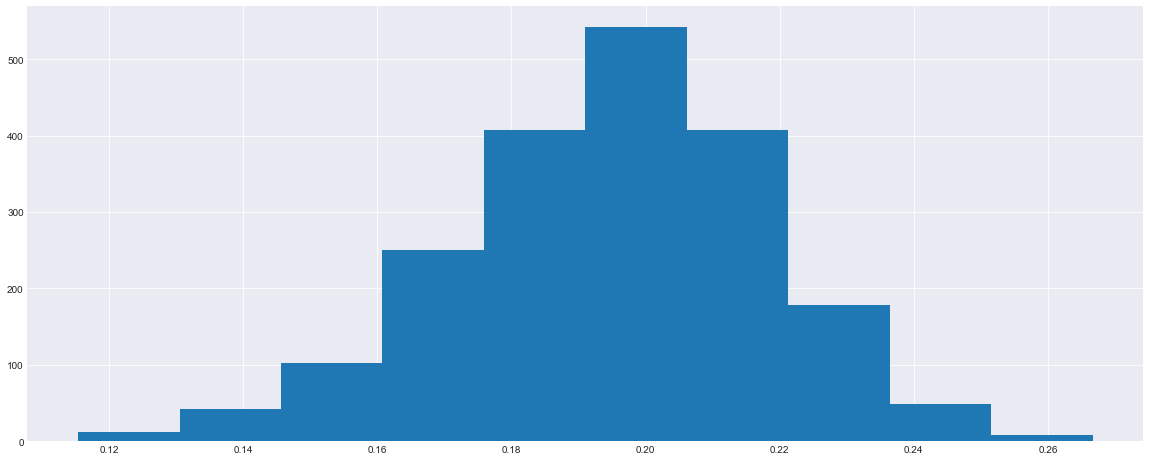

In [43]:
#Distribution of word density
data['word_density'].hist()

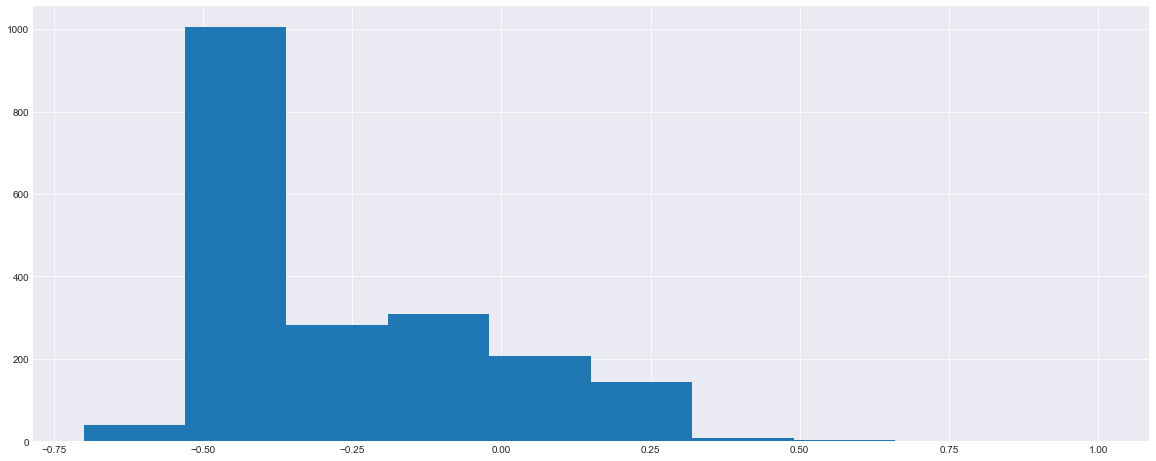

In [44]:
#Distribution of polarity
data['polarity'].hist()

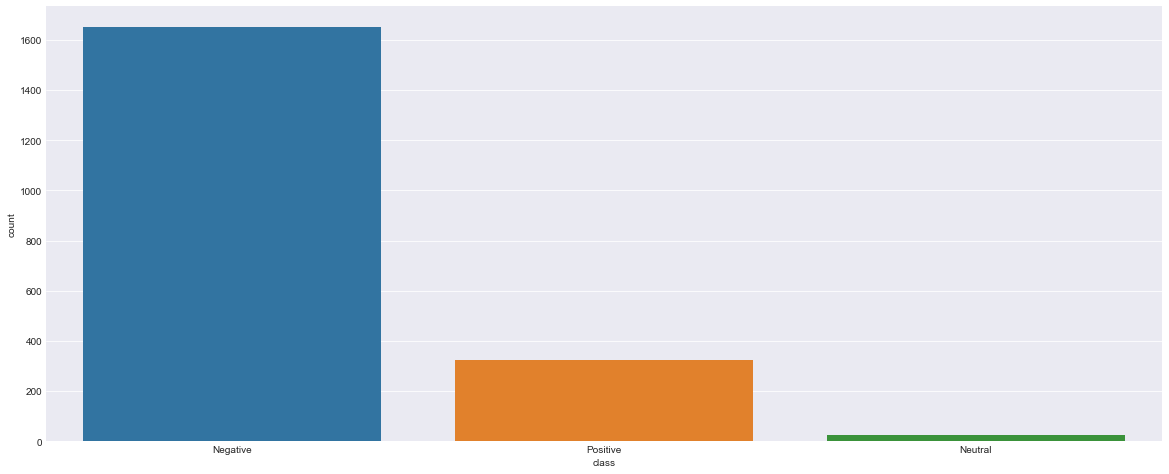

In [45]:
#Movie sentiment
sns.countplot(x=data['class'])

# Predicting tweet sentiment

Bag of Words

We will use the Bag of Words Model(BOW), which is used to represent the text in the form of a bag of words, i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity, i.e. (the number of times a word occurs in a document) is the main point of concern.
Basically, it describes the total occurrence of words within a document.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
X=data['tweet']
y=data['class']

In [50]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = data['class']

**We would be using the Naive Bayes model for sentiment classification.**

In [51]:
from sklearn.naive_bayes import GaussianNB

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
nb=GaussianNB()
nb.fit(X_train.toarray(),y_train)

GaussianNB(priors=None)

In [60]:
#Predictions over test set
predictions=nb.predict(X_test.toarray())

In [62]:
#Accuracy using accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.7116666666666667

The accuracy score of our model is 71% which is a fairly good score